# 📚 All the library that we needs

In [127]:
# Data Imports
import pandas as pd
import warnings

# Preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from collections import Counter

# Visualization Imports
import seaborn as sns
import matplotlib.pyplot as plt 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

# Classification 
from sklearn.ensemble import RandomForestClassifier # For Random Forest Model
from sklearn.svm import SVC # For SVM Model
from sklearn.tree import DecisionTreeClassifier # For Decision Tree Model
from sklearn.neighbors import KNeighborsClassifier # For KNN Model
from sklearn.naive_bayes import GaussianNB # For Naive Bayes Model
from sklearn.neural_network import MLPClassifier # For Neural Network Model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # For visualizing CReport, CM, and accuracy
from sklearn.model_selection import train_test_split # For Validation Model

# For Importing our Plotly Charts into Web
import chart_studio

username = 'MadRafNaj'
api_key = 'wCbE6fNnz8p5L0A962jH'

chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

import chart_studio.plotly as py
import chart_studio.tools as tls

# Visualization Configurations
pio.templates.default = "plotly_dark"
%config InlineBackend.figure_format = 'retina'

warnings.filterwarnings('ignore')

## Load Data

In [2]:
dataset = pd.read_csv("Data_Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta 2023 fix.csv")

## 📌 KETERANGAN
 *Perlu diketahui bawha data diamnbil dari Website Satu Data Jakarta*

*Data diambil dimulai dari bulan desember tahun 2022 sampai bulan november tahun 2023. 12 bulan keseluruhan*

##### DKI 1 Bunderan HI
##### DKI 2 Kelapa Gading
##### DKI 3 Jagakarsa
##### DKI 4 Lubang Buaya
##### DKI 5 Kebon Jeruk  Jakarta Barat

In [3]:
dataset

,periode_data,tanggal,stasiun,PM10,PM2.5,SO2,CO,O3,NO2,max,parameter_pencemar_kritis,kategori
0,202302,2/25/2023,DKI5 Kebon Jeruk Jakarta Barat,35.0,NaN,13.0,12.0,31.0,18.0,35,PM10,BAIK
1,202302,2/26/2023,DKI5 Kebon Jeruk Jakarta Barat,23.0,NaN,14.0,9.0,32.0,11.0,32,O3,BAIK
2,202302,2/27/2023,DKI5 Kebon Jeruk Jakarta Barat,20.0,NaN,13.0,8.0,33.0,13.0,33,O3,BAIK
3,202302,2/28/2023,DKI5 Kebon Jeruk Jakarta Barat,30.0,NaN,21.0,11.0,28.0,18.0,30,PM10,BAIK
4,202303,3/1/2023,DKI1 Bunderan HI,38.0,44.0,50.0,8.0,19.0,27.0,50,SO2,BAIK
...,...,...,...,...,...,...,...,...,...,...,...,...
1799,202311,11/26/2023,DKI5 Kebon Jeruk,48.0,71.0,33.0,21.0,44.0,20.0,71,PM2.5,SEDANG
1800,202311,11/27/2023,DKI5 Kebon Jeruk,51.0,76.0,32.0,18.0,53.0,19.0,76,PM2.5,SEDANG
1801,202311,11/28/2023,DKI5 Kebon Jeruk,56.0,88.0,33.0,20.0,48.0,21.0,88,PM2.5,SEDANG
1802,202311,11/29/2023,DKI5 Kebon Jeruk,56.0,88.0,32.0,18.0,56.0,18.0,88,PM2.5,SEDANG


# ⚙️ Data Preprocessing

In [4]:
# Parse tanggal into datetime type

dataset.tanggal = pd.to_datetime(dataset.tanggal)

In [5]:
# Meng-urutkan Data Berdasarkan Tanggal

dataset = dataset.sort_values(by='tanggal')

#### Viewing The First and Last 5 Rows

In [6]:
dataset.head()

,periode_data,tanggal,stasiun,PM10,PM2.5,SO2,CO,O3,NO2,max,parameter_pencemar_kritis,kategori
189,202212,2022-12-01,DKI1 Bunderan HI,54.0,73.0,36.0,12.0,22.0,13.0,73,PM2.5,SEDANG
251,202212,2022-12-01,DKI3 Jagakarsa,53.0,81.0,42.0,9.0,24.0,12.0,81,PM2.5,SEDANG
282,202212,2022-12-01,DKI4 Lubang Buaya,64.0,93.0,52.0,7.0,27.0,19.0,93,PM2.5,SEDANG
313,202212,2022-12-01,DKI5 Kebon Jeruk Jakarta Barat,52.0,NaN,18.0,17.0,27.0,5.0,52,PM10,SEDANG
220,202212,2022-12-01,DKI2 Kelapa Gading,59.0,74.0,46.0,15.0,50.0,31.0,74,PM2.5,SEDANG


In [7]:
dataset.tail()

,periode_data,tanggal,stasiun,PM10,PM2.5,SO2,CO,O3,NO2,max,parameter_pencemar_kritis,kategori
1773,202311,2023-11-30,DKI4 Lubang Buaya,46.0,67.0,29.0,18.0,23.0,17.0,67,PM2.5,SEDANG
1668,202311,2023-11-30,DKI2 Kelapa Gading,38.0,59.0,32.0,8.0,33.0,26.0,59,PM2.5,SEDANG
1698,202311,2023-11-30,DKI3 Jagakarsa,37.0,43.0,55.0,13.0,21.0,8.0,55,SO2,SEDANG
1638,202311,2023-11-30,DKI1 Bunderan HI,38.0,67.0,43.0,12.0,34.0,34.0,67,PM2.5,SEDANG
1803,202311,2023-11-30,DKI5 Kebon Jeruk,30.0,57.0,32.0,15.0,61.0,17.0,61,O3,SEDANG


In [8]:
dataset.shape

(1804, 12)

*Data Memiliki 1804 baris dan 12 Kolom Atribut*

In [9]:
counts = dataset['kategori'].value_counts()

print(counts)

kategori
SEDANG                1358
BAIK                   236
TIDAK SEHAT            207
SANGAT TIDAK SEHAT       3
Name: count, dtype: int64


#### Check Dataset Information and Missing Data

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1804 entries, 189 to 1803
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   periode_data               1804 non-null   int64         
 1   tanggal                    1804 non-null   datetime64[ns]
 2   stasiun                    1804 non-null   object        
 3   PM10                       1603 non-null   float64       
 4   PM2.5                      1530 non-null   float64       
 5   SO2                        1786 non-null   float64       
 6   CO                         1781 non-null   float64       
 7   O3                         1796 non-null   float64       
 8   NO2                        1759 non-null   float64       
 9   max                        1804 non-null   int64         
 10  parameter_pencemar_kritis  1804 non-null   object        
 11  kategori                   1804 non-null   object        
dtypes: dateti

In [11]:
dataset.isnull().sum()

periode_data                   0
tanggal                        0
stasiun                        0
PM10                         201
PM2.5                        274
SO2                           18
CO                            23
O3                             8
NO2                           45
max                            0
parameter_pencemar_kritis      0
kategori                       0
dtype: int64

### ❌ Missing data
 *Dapat Dilihat pada info dataset diatas terdapat missing data di beberapa attribut*

 *Untuk Meng-handle missing data tersebut, maka akan dilakukan pengisian dengan metode linear interpolation. di mana kita menggunakan nilai sekitarnya untuk memperkirakan nilai yang hilang berdasarkan garis lurus antara titik data yang ada*

In [12]:
dataset['PM10'] = dataset['PM10'].interpolate(method='linear')
dataset['PM2.5'] = dataset['PM2.5'].interpolate(method='linear')
dataset['SO2'] = dataset['SO2'].interpolate(method='linear')
dataset['CO'] = dataset['CO'].interpolate(method='linear')
dataset['O3'] = dataset['O3'].interpolate(method='linear')
dataset['NO2'] = dataset['NO2'].interpolate(method='linear')

In [13]:
dataset.isnull().sum()

periode_data                 0
tanggal                      0
stasiun                      0
PM10                         0
PM2.5                        0
SO2                          0
CO                           0
O3                           0
NO2                          0
max                          0
parameter_pencemar_kritis    0
kategori                     0
dtype: int64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1804 entries, 189 to 1803
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   periode_data               1804 non-null   int64         
 1   tanggal                    1804 non-null   datetime64[ns]
 2   stasiun                    1804 non-null   object        
 3   PM10                       1804 non-null   float64       
 4   PM2.5                      1804 non-null   float64       
 5   SO2                        1804 non-null   float64       
 6   CO                         1804 non-null   float64       
 7   O3                         1804 non-null   float64       
 8   NO2                        1804 non-null   float64       
 9   max                        1804 non-null   int64         
 10  parameter_pencemar_kritis  1804 non-null   object        
 11  kategori                   1804 non-null   object        
dtypes: dateti

####  ✅ Missing Data Handled

In [15]:
dataset.describe()

,periode_data,tanggal,PM10,PM2.5,SO2,CO,O3,NO2,max
count,1804.000000,1804,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000
mean,202297.944013,2023-05-31 22:40:58.536585472,53.041851,77.398282,38.106984,12.634146,28.255820,17.640521,74.315410
min,202212.000000,2022-12-01 00:00:00,3.000000,16.000000,11.000000,1.000000,4.000000,0.000000,20.000000
25%,202303.000000,2023-03-01 00:00:00,43.000000,63.000000,27.000000,8.000000,19.000000,12.000000,57.000000
50%,202306.000000,2023-06-01 00:00:00,55.000000,77.750000,39.000000,11.000000,26.000000,17.000000,74.000000
75%,202308.000000,2023-08-31 00:00:00,63.625000,91.000000,52.000000,16.000000,35.000000,23.000000,88.000000
max,202311.000000,2023-11-30 00:00:00,163.000000,287.000000,89.000000,55.000000,81.000000,53.000000,287.000000
std,26.528894,NaN,15.486840,23.467272,13.368997,6.612231,13.055944,8.713126,23.927575


In [16]:
# Checking Duplicate Data

dataset[dataset.duplicated() == True]

,periode_data,tanggal,stasiun,PM10,PM2.5,SO2,CO,O3,NO2,max,parameter_pencemar_kritis,kategori


In [17]:
# Checking Unique Data in 'parameter_pencemar_kritis'

dataset.parameter_pencemar_kritis.unique()

array(['PM2.5', 'PM10', 'SO2', 'O3'], dtype=object)

In [18]:
# Checking Unique Data in 'kategori'

dataset.kategori.unique()

array(['SEDANG', 'BAIK', 'TIDAK SEHAT', 'SANGAT TIDAK SEHAT'],
      dtype=object)

# 📖 Information

*Berdasarkan Peraturan Menteri Lingkungan Hidup dan Kehutanan Republik Indonesia P.14/MENLHK/SETJEN/KUM.1/7/2020 tentang 'Indeks Standar Pencemar Udara (ISPU)', beberapa parameter seperti:*

| Parameter      | Symbol | 
|:--------------:|:--------------:|
| Particle  | PM10           |
| Particle   | PM2.5           |
| Karbon Monoksida  | CO |
|Nitrogen Dioksida   | NO2          |
| Sulfur Dioksida   | SO2          |
|Ozon |O3|

*Keterangan Range Polusi*

| Category      | Range | 
|:--------------:|:--------------:|
| Baik (Good)	 |1-50          |
|Sedang (Fair) |51-100|
|Tidak Sehat (Not healty)| 101-200 |
|Sangat Tidak Sehat (Very not healty)   | 201-300 |
|Berbahaya (Dangerous)   | 301 >=  |

In [163]:
# Lakukan Rename kolom ke nama yang umum dan hapus atribut yang tidak diperlukan
dataset = dataset.rename(columns={'parameter_pencemar_kritis': 'critical', 'kategori': 'category'})

In [ ]:
dataset = dataset.drop('periode_data', axis=1)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1804 entries, 189 to 1803
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   1804 non-null   datetime64[ns]
 1   stasiun   1804 non-null   object        
 2   PM10      1804 non-null   float64       
 3   PM2.5     1804 non-null   float64       
 4   SO2       1804 non-null   float64       
 5   CO        1804 non-null   float64       
 6   O3        1804 non-null   float64       
 7   NO2       1804 non-null   float64       
 8   max       1804 non-null   int64         
 9   critical  1804 non-null   object        
 10  category  1804 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 169.1+ KB


#### Mengubah Penamaan Stasiun

In [21]:
dataset.stasiun.unique()

array(['DKI1  Bunderan HI ', 'DKI3  Jagakarsa ', 'DKI4  Lubang Buaya ',
       'DKI5  Kebon Jeruk  Jakarta Barat', 'DKI2  Kelapa Gading ',
       ' DKI1  Bunderan HI ', ' DKI2  Kelapa Gading  ',
       ' DKI4  Lubang Buaya  ', ' DKI3  Jagakarsa  ',
       ' DKI1  Bunderan HI  ', ' DKI5  Kebon Jeruk  Jakarta Barat ',
       'DKI3 Jagakarsa', 'DKI5 Kebon Jeruk', 'DKI2 Kelapa Gading',
       'DKI1 Bunderan HI', 'DKI4 Lubang Buaya'], dtype=object)

In [22]:
dataset['stasiun'] = dataset['stasiun'].replace('DKI5 Kebon Jeruk Jakarta Barat', 'DKI5')
dataset['stasiun'] = dataset['stasiun'].replace('DKI5 Kebon Jeruk', 'DKI5')
dataset['stasiun'] = dataset['stasiun'].replace(' DKI5  Kebon Jeruk  Jakarta Barat ', 'DKI5')
dataset['stasiun'] = dataset['stasiun'].replace(' DKI4  Lubang Buaya  ', 'DKI4')
dataset['stasiun'] = dataset['stasiun'].replace('DKI4 Lubang Buaya', 'DKI4')
dataset['stasiun'] = dataset['stasiun'].replace('DKI4  Lubang Buaya ', 'DKI4')
dataset['stasiun'] = dataset['stasiun'].replace('DKI3  Jagakarsa ', 'DKI3')
dataset['stasiun'] = dataset['stasiun'].replace('DKI3 Jagakarsa', 'DKI3')
dataset['stasiun'] = dataset['stasiun'].replace(' DKI3  Jagakarsa  ', 'DKI3')
dataset['stasiun'] = dataset['stasiun'].replace('DKI2  Kelapa Gading ', 'DKI2')
dataset['stasiun'] = dataset['stasiun'].replace('DKI2 Kelapa Gading', 'DKI2')
dataset['stasiun'] = dataset['stasiun'].replace(' DKI2  Kelapa Gading  ', 'DKI2')
dataset['stasiun'] = dataset['stasiun'].replace(' DKI1  Bunderan HI ', 'DKI1')
dataset['stasiun'] = dataset['stasiun'].replace('DKI1 Bunderan HI', 'DKI1')
dataset['stasiun'] = dataset['stasiun'].replace('DKI1  Bunderan HI ', 'DKI1')
dataset['stasiun'] = dataset['stasiun'].replace(' DKI1  Bunderan HI  ', 'DKI1')
dataset['stasiun'] = dataset['stasiun'].replace('DKI5  Kebon Jeruk  Jakarta Barat', 'DKI5')

In [23]:
dataset.stasiun.unique()

array(['DKI1', 'DKI3', 'DKI4', 'DKI5', 'DKI2'], dtype=object)

In [24]:
dataset

,tanggal,stasiun,PM10,PM2.5,SO2,CO,O3,NO2,max,critical,category
189,2022-12-01,DKI1,54.0,73.0,36.0,12.0,22.0,13.0,73,PM2.5,SEDANG
251,2022-12-01,DKI3,53.0,81.0,42.0,9.0,24.0,12.0,81,PM2.5,SEDANG
282,2022-12-01,DKI4,64.0,93.0,52.0,7.0,27.0,19.0,93,PM2.5,SEDANG
313,2022-12-01,DKI5,52.0,83.5,18.0,17.0,27.0,5.0,52,PM10,SEDANG
220,2022-12-01,DKI2,59.0,74.0,46.0,15.0,50.0,31.0,74,PM2.5,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
1773,2023-11-30,DKI4,46.0,67.0,29.0,18.0,23.0,17.0,67,PM2.5,SEDANG
1668,2023-11-30,DKI2,38.0,59.0,32.0,8.0,33.0,26.0,59,PM2.5,SEDANG
1698,2023-11-30,DKI3,37.0,43.0,55.0,13.0,21.0,8.0,55,SO2,SEDANG
1638,2023-11-30,DKI1,38.0,67.0,43.0,12.0,34.0,34.0,67,PM2.5,SEDANG


In [25]:
# Data Tanpa Data Tipe Objek saja
df = dataset

df = df.drop(columns={'stasiun'})
df = df.drop(columns={'critical'})
df = df.drop(columns={'category'})

In [26]:
df

,tanggal,PM10,PM2.5,SO2,CO,O3,NO2,max
189,2022-12-01,54.0,73.0,36.0,12.0,22.0,13.0,73
251,2022-12-01,53.0,81.0,42.0,9.0,24.0,12.0,81
282,2022-12-01,64.0,93.0,52.0,7.0,27.0,19.0,93
313,2022-12-01,52.0,83.5,18.0,17.0,27.0,5.0,52
220,2022-12-01,59.0,74.0,46.0,15.0,50.0,31.0,74
...,...,...,...,...,...,...,...,...
1773,2023-11-30,46.0,67.0,29.0,18.0,23.0,17.0,67
1668,2023-11-30,38.0,59.0,32.0,8.0,33.0,26.0,59
1698,2023-11-30,37.0,43.0,55.0,13.0,21.0,8.0,55
1638,2023-11-30,38.0,67.0,43.0,12.0,34.0,34.0,67


In [27]:
# Data Tanpa Data Tipe Objek dan tanggal
dfs = dataset

dfs = dfs.drop(columns={'tanggal'})
dfs = dfs.drop(columns={'stasiun'})
dfs = dfs.drop(columns={'critical'})
dfs = dfs.drop(columns={'category'})

In [28]:
dfs

,PM10,PM2.5,SO2,CO,O3,NO2,max
189,54.0,73.0,36.0,12.0,22.0,13.0,73
251,53.0,81.0,42.0,9.0,24.0,12.0,81
282,64.0,93.0,52.0,7.0,27.0,19.0,93
313,52.0,83.5,18.0,17.0,27.0,5.0,52
220,59.0,74.0,46.0,15.0,50.0,31.0,74
...,...,...,...,...,...,...,...
1773,46.0,67.0,29.0,18.0,23.0,17.0,67
1668,38.0,59.0,32.0,8.0,33.0,26.0,59
1698,37.0,43.0,55.0,13.0,21.0,8.0,55
1638,38.0,67.0,43.0,12.0,34.0,34.0,67


In [29]:
# Pisahkan Data untuk train
df_train = dataset.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1804 entries, 189 to 1803
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   1804 non-null   datetime64[ns]
 1   stasiun   1804 non-null   object        
 2   PM10      1804 non-null   float64       
 3   PM2.5     1804 non-null   float64       
 4   SO2       1804 non-null   float64       
 5   CO        1804 non-null   float64       
 6   O3        1804 non-null   float64       
 7   NO2       1804 non-null   float64       
 8   max       1804 non-null   int64         
 9   critical  1804 non-null   object        
 10  category  1804 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 169.1+ KB


In [30]:
# Drop kolom yang tidak perlu
df_train = df_train.drop(columns={'stasiun'})
df_train = df_train.drop(columns={'critical'})
df_train = df_train.drop(columns={'tanggal'})

In [31]:
category_counts = df_train['category'].value_counts()
print("Frekuensi kategori:\n", category_counts)

# Menghapus kategori yang memiliki frekuensi kurang dari 20.
categories_to_remove = category_counts[category_counts <= 20].index
print("Kategori yang akan dihapus:", categories_to_remove)

# Menghapus baris yang termasuk dalam kategori tersebut
df_train_filtered = df_train[~df_train['category'].isin(categories_to_remove)]

Frekuensi kategori:
 category
SEDANG                1358
BAIK                   236
TIDAK SEHAT            207
SANGAT TIDAK SEHAT       3
Name: count, dtype: int64
Kategori yang akan dihapus: Index(['SANGAT TIDAK SEHAT'], dtype='object', name='category')


In [32]:
print("Frekuensi kategori:\n", category_counts)

Frekuensi kategori:
 category
SEDANG                1358
BAIK                   236
TIDAK SEHAT            207
SANGAT TIDAK SEHAT       3
Name: count, dtype: int64


In [33]:
# ubah kolom category menjadi numerik
le = LabelEncoder()
df_train_filtered['category'] = le.fit_transform(df_train_filtered['category'].astype(str))

# 📈 Data Visualization

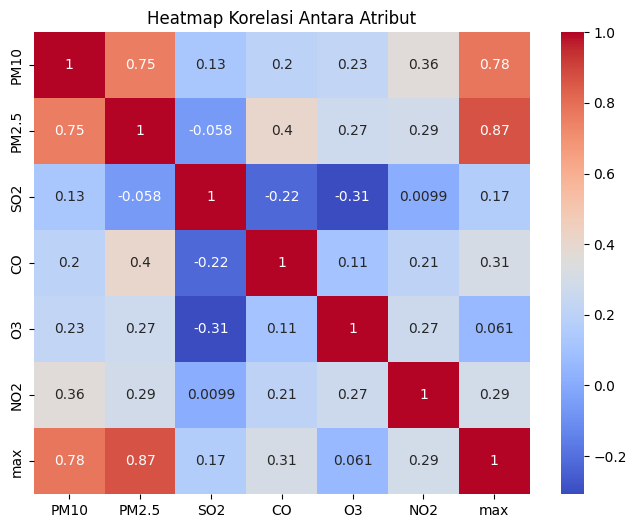

In [34]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dfs.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antara Atribut')
plt.show()

#### Kita dapat melihat kolom/atribut max memiliki korelasi yang tinggi antara pm2.5 dan pm10

### Data Tiap Polutan Per-Minggu

<Axes: title={'center': 'Grafik Garis PM10'}, xlabel='tanggal'>

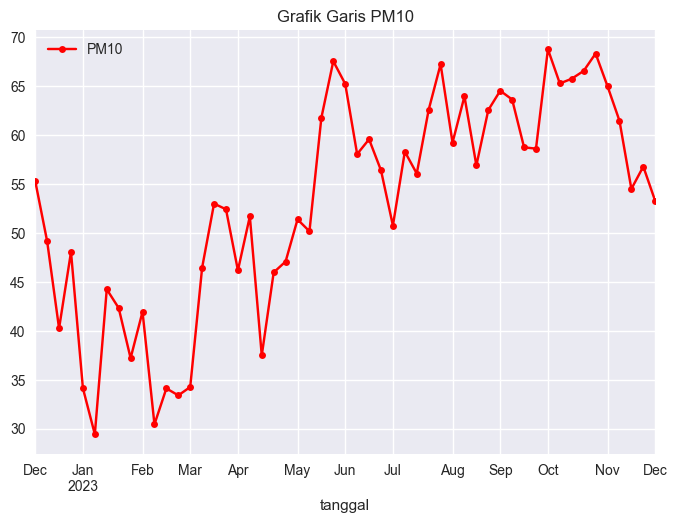

In [35]:
plt.style.use('seaborn-v0_8')

# 'W' Artinya data perminggu
df_resample = (df.set_index('tanggal')).resample('W').mean().reset_index()

df_resample.plot(x='tanggal', y='PM10', kind='line', color='red', marker='.', markersize = 10, title = 'Grafik Garis PM10')

<Axes: title={'center': 'Grafik Garis PM2.5'}, xlabel='tanggal'>

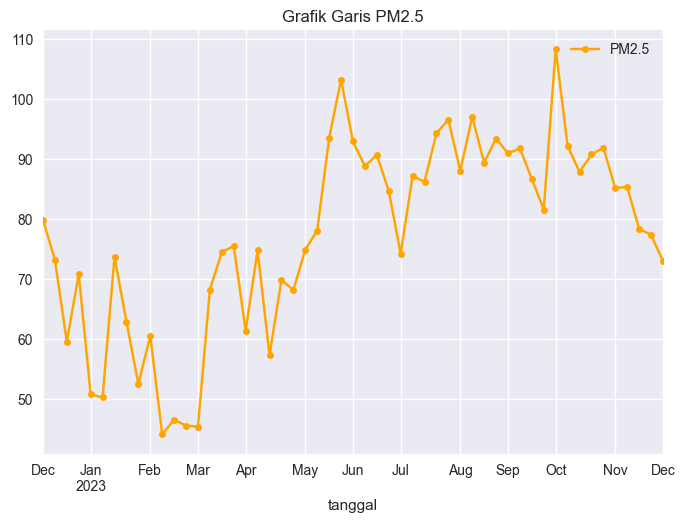

In [36]:
df_resample.plot(x='tanggal', y='PM2.5', kind='line', color='orange', marker='.', markersize = 10, title = 'Grafik Garis PM2.5')
# plt.xticks(rotation=45)

<Axes: title={'center': 'Grafik Garis SO2'}, xlabel='tanggal'>

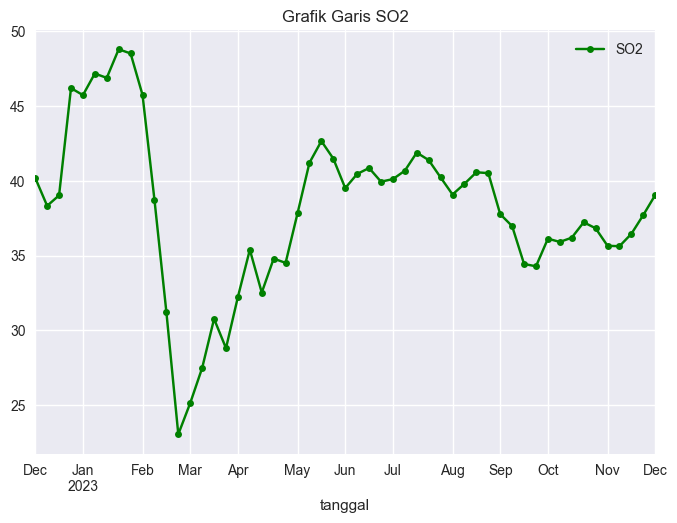

In [37]:
df_resample.plot(x='tanggal', y='SO2', kind='line', color='green', marker='.', markersize = 10, title = 'Grafik Garis SO2')

<Axes: title={'center': 'Grafik Garis CO3'}, xlabel='tanggal'>

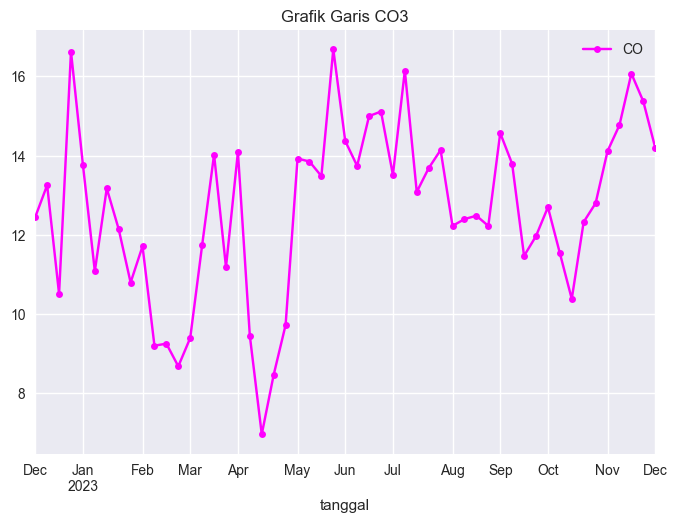

In [38]:
df_resample.plot(x='tanggal', y='CO', kind='line', color='magenta', marker='.', markersize = 10, title = 'Grafik Garis CO3')

<Axes: title={'center': 'Grafik Garis 03'}, xlabel='tanggal'>

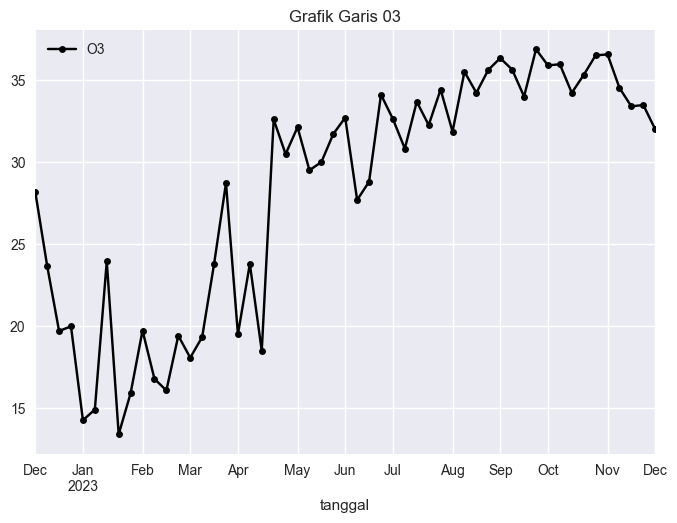

In [39]:
df_resample.plot(x='tanggal', y='O3', kind='line', color='black', marker='.', markersize = 10, title = 'Grafik Garis 03')

<Axes: title={'center': 'Grafik Garis NO2'}, xlabel='tanggal'>

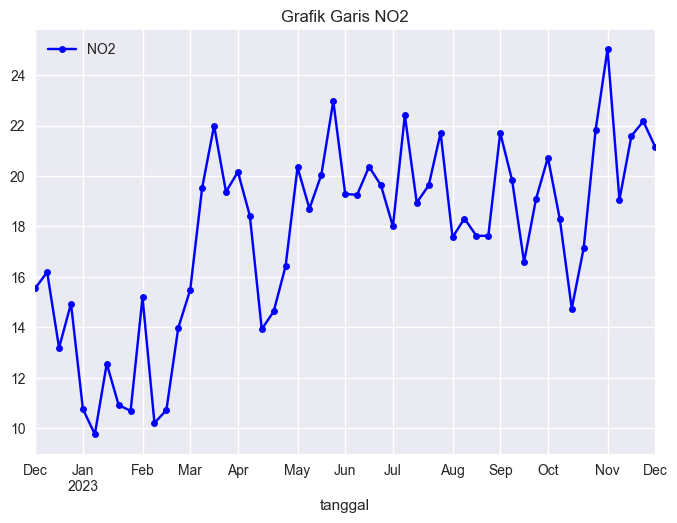

In [40]:
df_resample.plot(x='tanggal', y='NO2', kind='line', color='blue', marker='.', markersize = 10, title = 'Grafik Garis NO2')

#### Data Keseluruhan Polutan Per-Hari

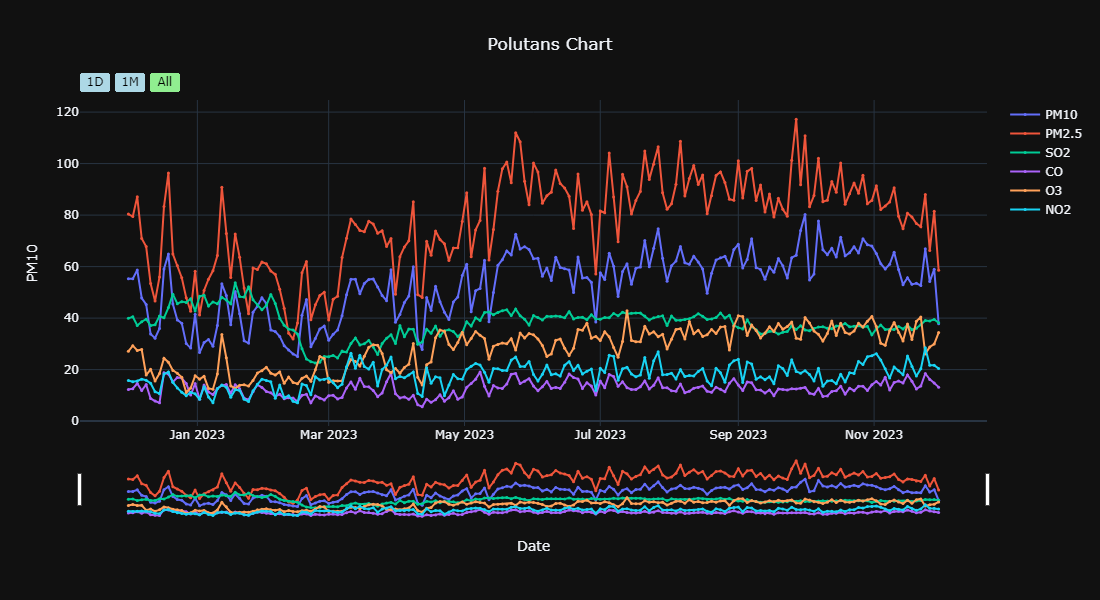

In [160]:
# Resample data, karena di tiap 1 hari ada multiple data kita ambil nilai mean per 2 hari
df_resamples = (df.set_index('tanggal')).resample('2D').mean().reset_index()

# Custom warna tiap polutan
colors = {
    'PM10': 'rgba(0, 0, 0, 0.5)',
    'O3': 'green',
    'PM2.5': 'rgba(3, 138, 255, 0.5)',
    'SO2': 'rgba(15, 10, 222, 1)',
    'CO': 'red',
    'NO2': 'red'
}

# Plot the volume
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_resamples['tanggal'], y=df_resamples['PM10'], mode='lines+markers', name='PM10', marker=dict(size=3)))
fig.add_trace(go.Scatter(x=df_resamples['tanggal'], y=df_resamples['PM2.5'], mode='lines+markers', name='PM2.5', marker=dict(size=3)))
fig.add_trace(go.Scatter(x=df_resamples['tanggal'], y=df_resamples['SO2'], mode='lines+markers', name='SO2', marker=dict(size=3)))
fig.add_trace(go.Scatter(x=df_resamples['tanggal'], y=df_resamples['CO'], mode='lines+markers', name='CO', marker=dict(size=3)))
fig.add_trace(go.Scatter(x=df_resamples['tanggal'], y=df_resamples['O3'], mode='lines+markers', name='O3', marker=dict(size=3)))
fig.add_trace(go.Scatter(x=df_resamples['tanggal'], y=df_resamples['NO2'], mode='lines+markers', name='NO2', marker=dict(size=3)))


# Add buttons for different timeframes
fig.update_layout(
    title_text='Polutans Chart',
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='PM10',
    width=1100, height=600,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1D", step="day", stepmode="backward"),
                dict(count=1, label="1M", step="month", stepmode="backward"),
                dict(step="all", label="All")
            ]),
                bgcolor='lightblue',
                font=dict(color='black'),
                activecolor='lightgreen'
                ),
            rangeslider=dict(visible=True),
            type="date"
        ),    
)

fig.show()

In [161]:
py.plot(fig, filename='Polutans Charts', auto_open=False)

'https://plotly.com/~MadRafNaj/2/'

In [43]:
# Hitung banyaknya jenis polutan di nilai kritis (critical)
counts = dataset['critical'].value_counts()

print(counts)

critical
PM2.5    1405
PM10      174
SO2       126
O3         99
Name: count, dtype: int64


In [44]:
## resample data tanpa kolom max

dfs_res = dfs

dfs_res = dfs_res.drop(columns={'max'})
dfs_res

,PM10,PM2.5,SO2,CO,O3,NO2
189,54.0,73.0,36.0,12.0,22.0,13.0
251,53.0,81.0,42.0,9.0,24.0,12.0
282,64.0,93.0,52.0,7.0,27.0,19.0
313,52.0,83.5,18.0,17.0,27.0,5.0
220,59.0,74.0,46.0,15.0,50.0,31.0
...,...,...,...,...,...,...
1773,46.0,67.0,29.0,18.0,23.0,17.0
1668,38.0,59.0,32.0,8.0,33.0,26.0
1698,37.0,43.0,55.0,13.0,21.0,8.0
1638,38.0,67.0,43.0,12.0,34.0,34.0


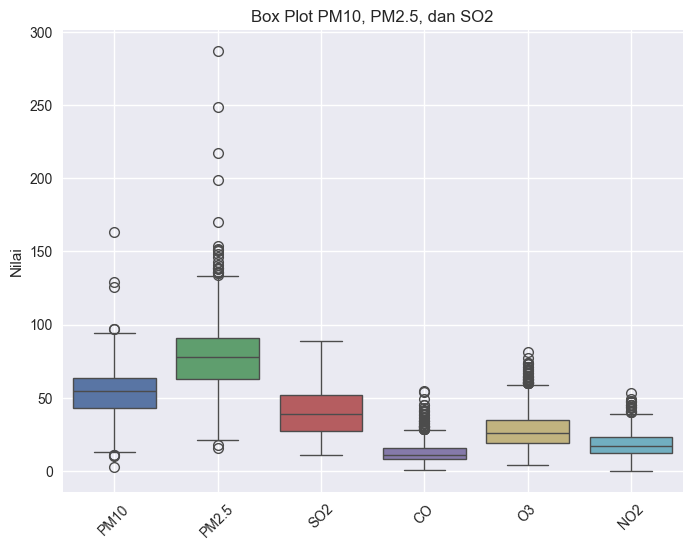

In [70]:
# Plot box plot
plt.figure(figsize=(8, 6))
sns.boxplot(dfs_res)
plt.title('Box Plot PM10, PM2.5, dan SO2')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Pada boxplot diatas kita bisa melihat outlier ada di nilai 200 keatas. Nilai tersebut masuk ke kategori sangat tidak sehat yang mana hanya memiliki 3 data. Maka peneliti menghapus data dari kategori sangat tidak sehat karena jumlah data yang kecil.

In [144]:
# untuk melihat boxplot saat data kategori sangat tidak sehat dihapus
df_train_filtered_new = df_train_filtered.drop(columns={'max'})
df_train_filtered_new = df_train_filtered.drop(columns={'category'})

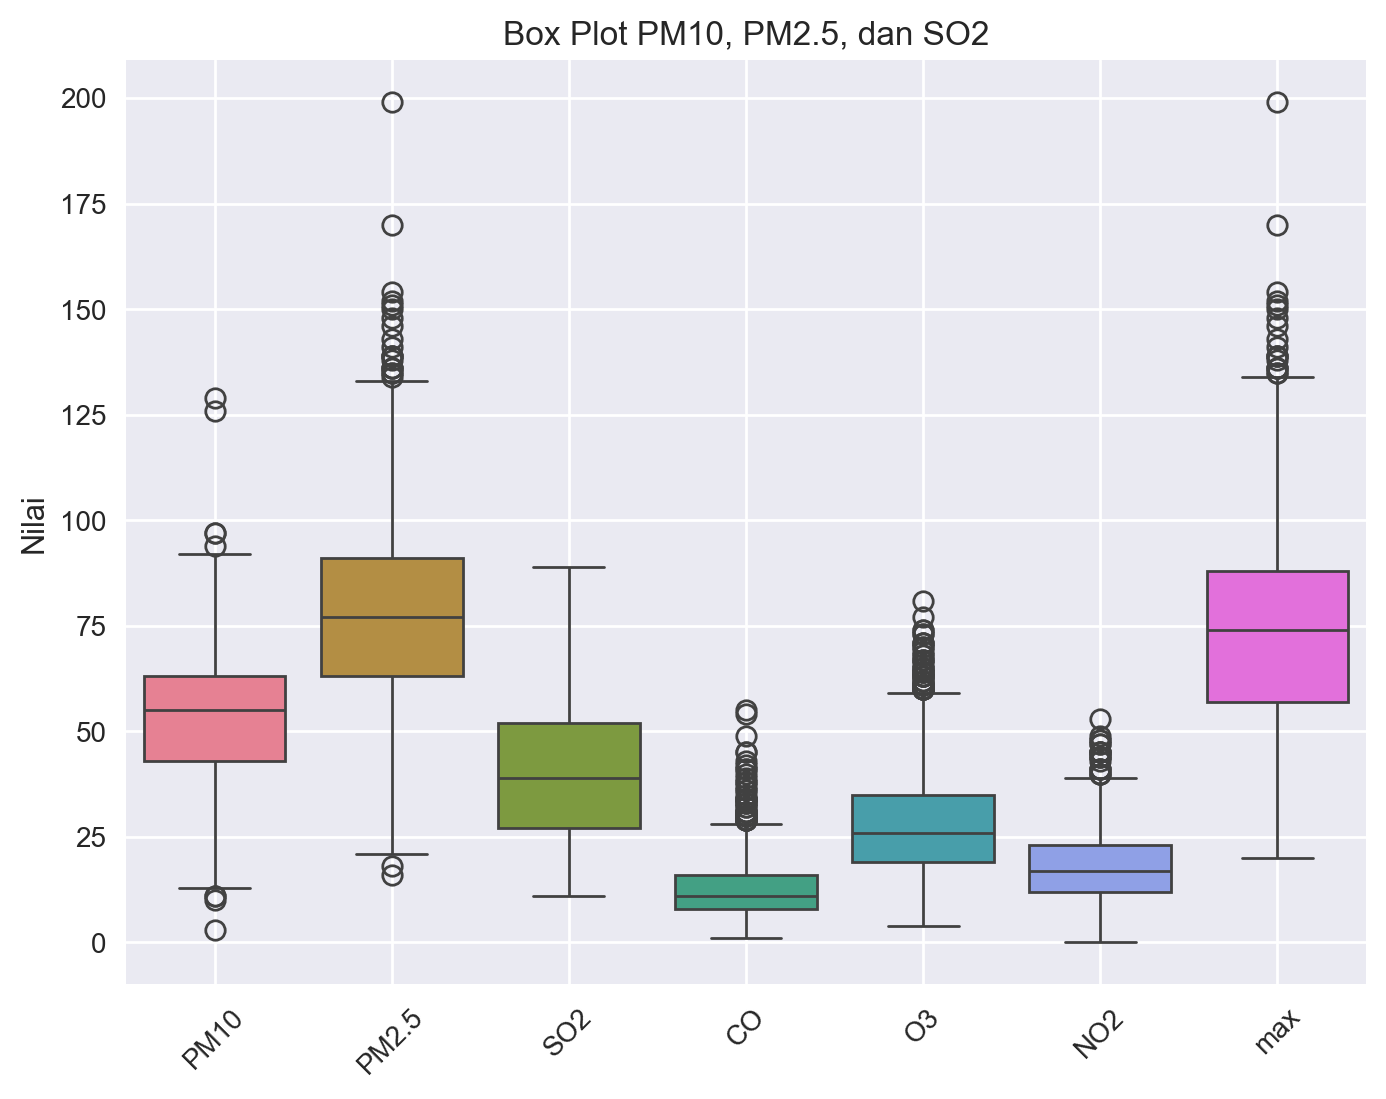

In [145]:
# Plot box plot
plt.figure(figsize=(8, 6))
sns.boxplot(df_train_filtered_new)
plt.title('Box Plot PM10, PM2.5, dan SO2')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

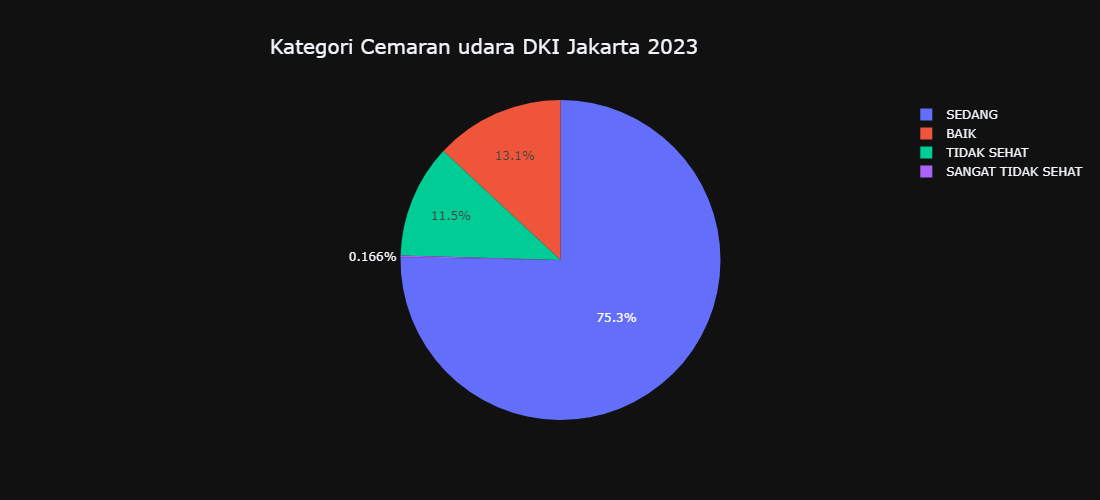

In [179]:
category_counts = dataset['category'].value_counts()

# Create a pie chart
figs1 = px.pie(category_counts, 
             values=category_counts.values, 
             names=category_counts.index,
             width=750,
             height=500,
             title='Kategori Cemaran udara DKI Jakarta 2023')  

# Update layout
figs1.update_layout(
    title={
        'y':0.92,
        'x':0.44,
    },
    title_font=dict(size=20)  # You can adjust the size if needed
)

# Show the pie chart
figs1.show()

In [181]:
py.plot(figs1, filename='Kategori Cemaran udara DKI Jakarta 2023', auto_open=False)

'https://plotly.com/~MadRafNaj/18/'

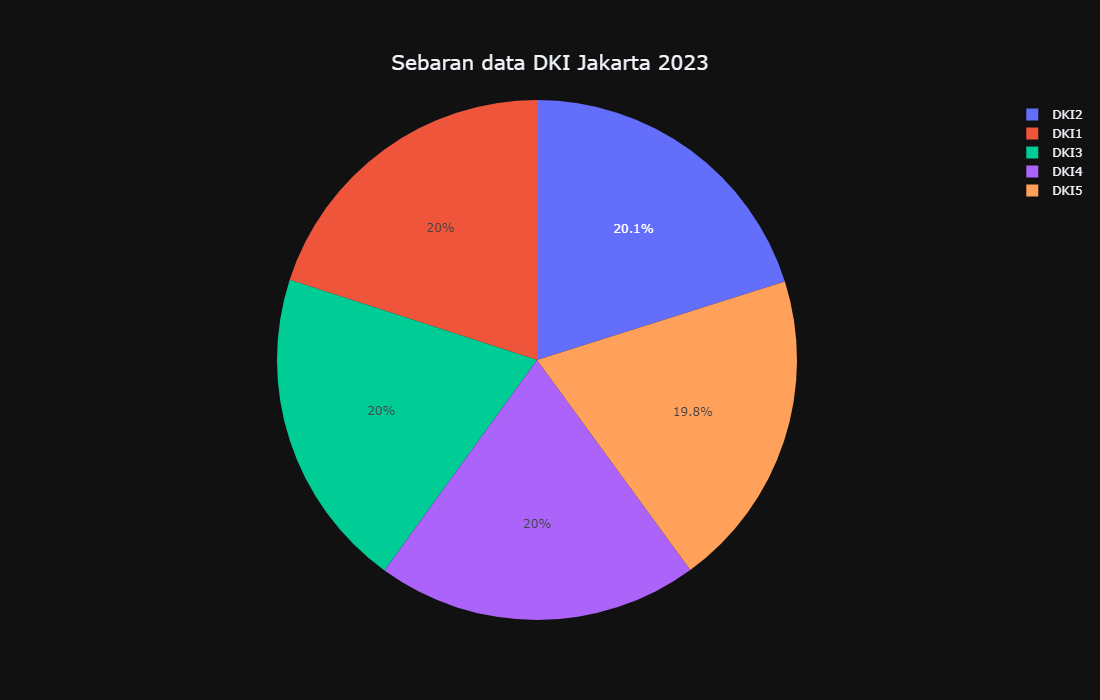

In [130]:
category_counts = dataset['stasiun'].value_counts()

# Create a pie chart
fig = px.pie(category_counts, 
             values=category_counts.values, 
             names=category_counts.index,
             width=800,
             height=700,
             title='Sebaran data DKI Jakarta 2023')  

# Update layout
fig.update_layout(
    title={
        'y':0.92,
        'x':0.5,
    },
    title_font=dict(size=20)  # You can adjust the size if needed
)

# Show the pie chart
fig.show()

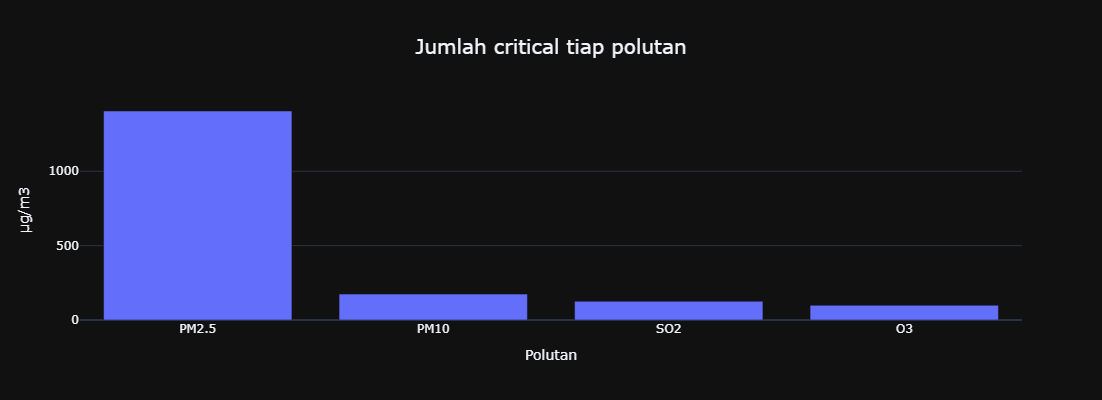

In [172]:
critical_counts = dataset['critical'].value_counts().reset_index()
critical_counts.columns = ['Polutan', 'Count']

# Create a bar chart
figs = px.bar(critical_counts, 
             x='Polutan', 
             y='Count', 
             height=400,
             title='Jumlah critical tiap polutan', 
             labels={'Polutan': 'Polutan', 'Count': 'µg/m3'})

# Update layout
figs.update_layout(
    title={
        'y':0.9,
        'x':0.5,
    },
    title_font=dict(size=20)  # You can adjust the size if needed
)

# Show the bar chart
figs.show()

In [173]:
py.plot(figs, filename='Jumlah critical tiap polutan', auto_open=False)

'https://plotly.com/~MadRafNaj/15/'

#### Mendapatkan skor rata-rata polutan dengan menggabungkan data per wilayah

In [49]:
df_agg = dataset.copy()

pollutant = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']

df_agg = pd.pivot_table(data=df_agg, index=['stasiun'], values=pollutant, aggfunc='mean').round().reset_index()

In [50]:
df_agg['category'] = pd.Series()

for index, row in enumerate(df_agg.itertuples()):
    temp_treeshold = 0
    for cell in row:
        if type(cell) == int or type(cell) == float:
            if cell > temp_treeshold:
                if cell in range(1,50):
                    df_agg.category.loc[index] = 'BAIK'
                elif cell in range(51,100):
                    df_agg.category.loc[index] = 'SEDANG'
                elif cell in range(101,200):
                    df_agg.category.loc[index] = 'TIDAK SEHAT'
                elif cell in range(201,300):
                    df_agg.category.loc[index] = 'SANGAT TIDAK SEHAT'
                else:
                    df_agg.category.loc[index] = 'BERBAHAYA'

                temp_treeshold = cell

df_agg

,stasiun,CO,NO2,O3,PM10,PM2.5,SO2,category
0,DKI1,10.0,25.0,26.0,52.0,74.0,44.0,SEDANG
1,DKI2,11.0,23.0,32.0,57.0,73.0,38.0,SEDANG
2,DKI3,9.0,10.0,22.0,54.0,70.0,48.0,SEDANG
3,DKI4,18.0,15.0,19.0,58.0,94.0,36.0,SEDANG
4,DKI5,16.0,15.0,42.0,45.0,75.0,23.0,SEDANG


In [152]:
PM10_val = df.loc[:,'PM10'].values
PM25_val = df.loc[:,'PM2.5'].values
CO_val = df.loc[:,'CO'].values
NO2_val = df.loc[:,'NO2'].values
O3_val = df.loc[:,'O3'].values
SO2_val = df.loc[:,'SO2'].values

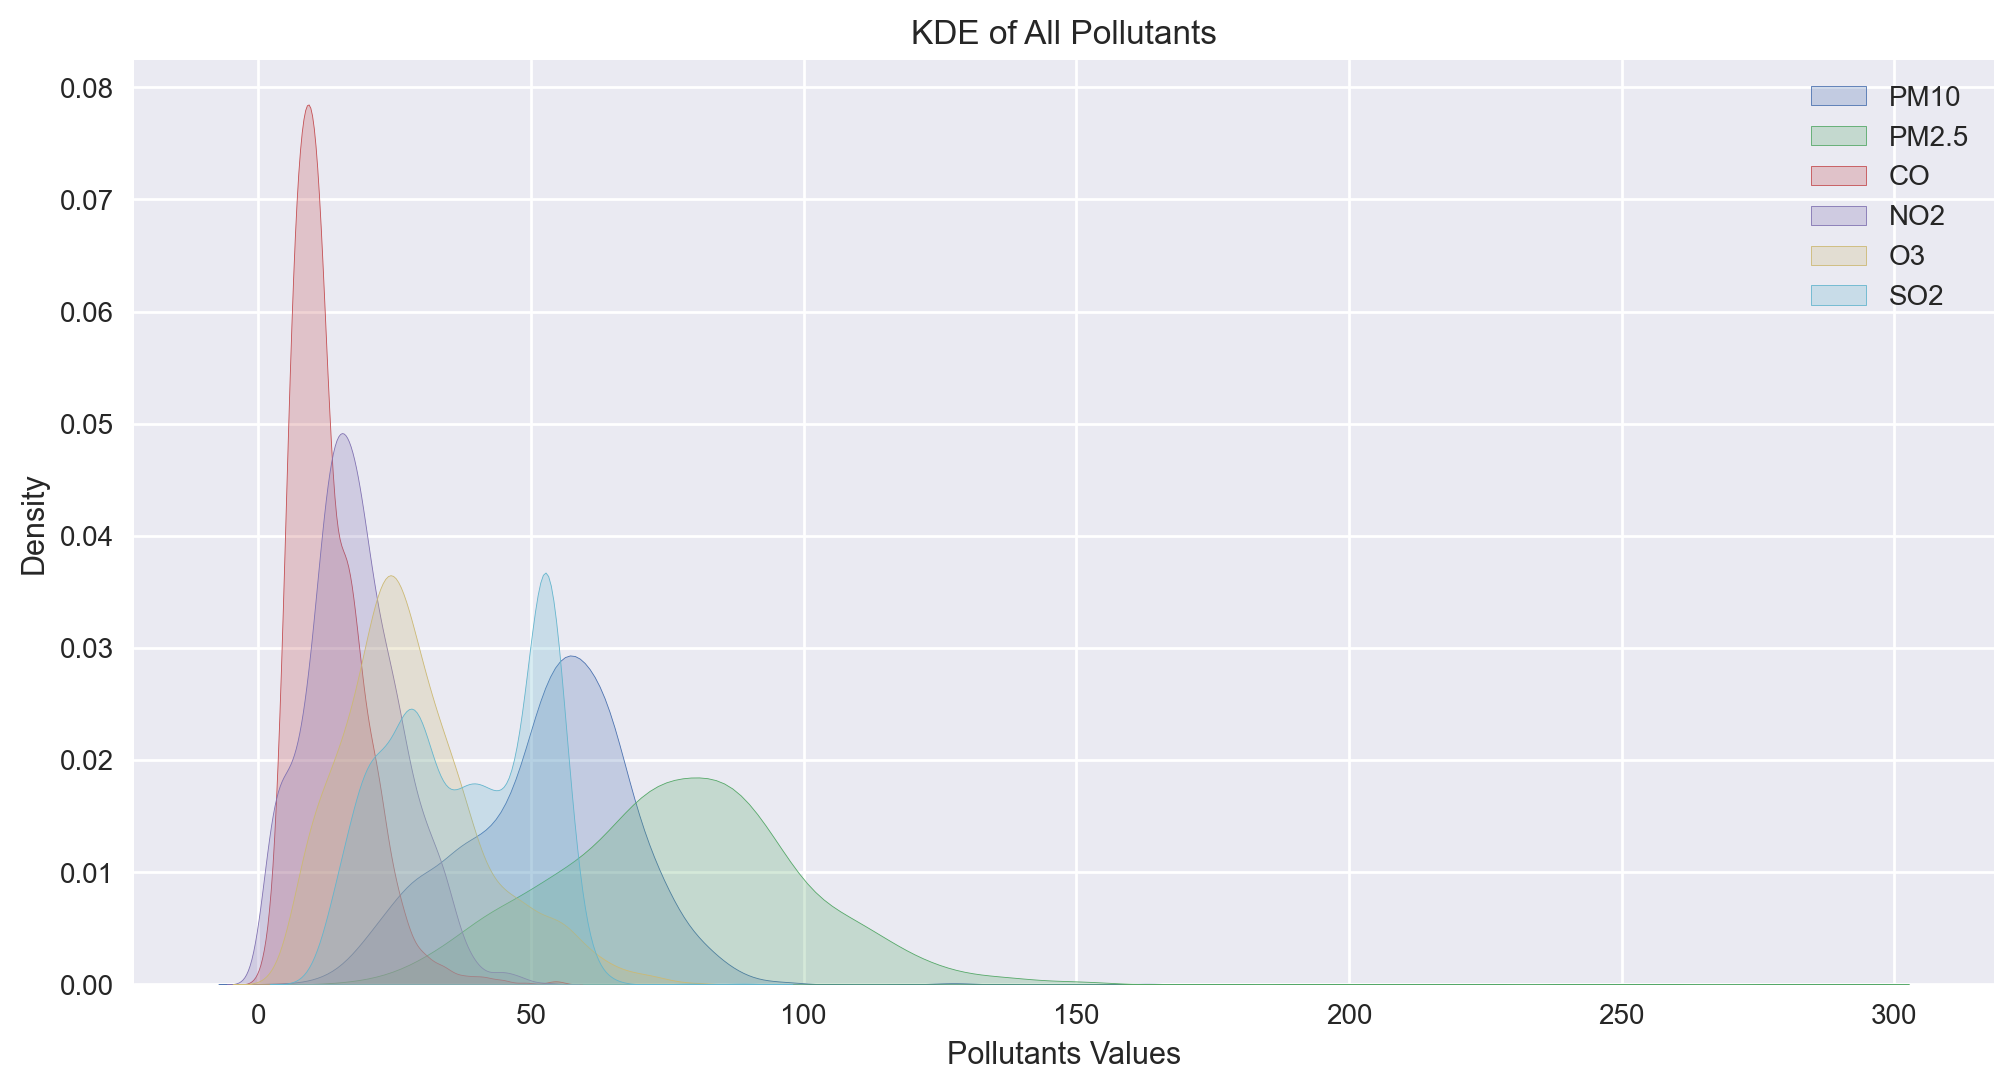

In [159]:
# Plot KDE plot (Kernel Density Estimation)
plt.figure(figsize=(12, 6))
sns.kdeplot(PM10_val, shade=True, label='PM10')
sns.kdeplot(PM25_val, shade=True, label='PM2.5')
sns.kdeplot(CO_val, shade=True, label='CO')
sns.kdeplot(NO2_val, shade=True, label='NO2')
sns.kdeplot(O3_val, shade=True, label='O3')
sns.kdeplot(SO2_val, shade=True, label='SO2')
plt.xlabel('Pollutants Values')
plt.ylabel('Density')
plt.title('KDE of All Pollutants')
plt.grid(True)
plt.legend()
plt.show()

# 🦾 Building All The Model

In [53]:
# Pertama kita pisahkan data label dengan data train
y = df_train_filtered["category"]
x = df_train_filtered[['PM10','PM2.5','SO2','CO','O3','NO2']]

In [54]:
# Normalisasi data fitur(x)
STscaler = StandardScaler()
x_scaled = STscaler.fit_transform(x)
x_scaled = STscaler.transform(x)
print(x_scaled)

[[ 0.06814113 -0.18382442 -0.15880285 -0.09433033 -0.47920274 -0.53183108]
 [ 0.00260192  0.17406252  0.28994809 -0.54817431 -0.3260925  -0.64654786]
 [ 0.72353328  0.71089292  1.03786632 -0.85073696 -0.09642714  0.15646961]
 ...
 [-1.04602552 -1.52590044  1.26224179  0.05695099 -0.55575786 -1.10541499]
 [-0.9804863  -0.45223963  0.36473991 -0.09433033  0.43945869  1.87722134]
 [-1.50480002 -0.8995983  -0.45797014  0.35951365  2.5064469  -0.07296395]]


In [164]:
# Untuk Validasi model menggunakan train_test_split dengan rasio data split 80:20
X_train, X_test, y_train, y_test = train_test_split(x_scaled, 
                                                    y, test_size = 0.2,
                                                    random_state = 42)
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({1: 1083, 0: 182, 2: 175})


In [56]:
# Pemodelan
svm = SVC() # SVM
dt = DecisionTreeClassifier() # Decision Tree
knn = KNeighborsClassifier() # KNN
rf = RandomForestClassifier() # Random Forest
nb = GaussianNB() # Naive Bayes
nn = MLPClassifier() # Neural Network Classifier

In [57]:
# Fit Model / Train model
svm.fit(X_train,y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)
nn.fit(X_train, y_train)

MLPClassifier()

In [58]:
# Lakukan Predict test data ke model yang telah dilatih
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_nn = nn.predict(X_test)

In [59]:
print("Suport Vector Machine")
# Tampilkan Classification Report
print(classification_report(y_test, y_pred_svm))

# Tampilkan Confusion Matrix
print(confusion_matrix(y_test, y_pred_svm))

# Tampilkan Akurasi
accuracy = accuracy_score(y_test, y_pred_svm) * 100
print(f"Accuracy: {accuracy:.1f}%")

Suport Vector Machine
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        54
           1       0.92      0.99      0.95       275
           2       0.97      0.91      0.94        32

    accuracy                           0.93       361
   macro avg       0.94      0.84      0.88       361
weighted avg       0.93      0.93      0.92       361

[[ 34  20   0]
 [  3 271   1]
 [  0   3  29]]
Accuracy: 92.5%


In [60]:
print("Decision Tree")
# Tampilkan Classification Report
print(classification_report(y_test, y_pred_dt))

# Tampilkan Confusion Matrix
print(confusion_matrix(y_test, y_pred_dt))

# Tampilkan Akurasi
accuracy = accuracy_score(y_test, y_pred_dt) * 100
print(f"Accuracy: {accuracy:.1f}%")

Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        54
           1       0.96      0.97      0.97       275
           2       0.97      1.00      0.98        32

    accuracy                           0.95       361
   macro avg       0.93      0.92      0.92       361
weighted avg       0.95      0.95      0.95       361

[[ 42  12   0]
 [  6 268   1]
 [  0   0  32]]
Accuracy: 94.7%


In [61]:
print("\nK-Nearest Neighbors")
# Tampilkan Classification Report
print(classification_report(y_test, y_pred_knn))

# Tampilkan Confusion Matrix
print(confusion_matrix(y_test, y_pred_knn))

# Tampilkan Akurasi
accuracy = accuracy_score(y_test, y_pred_knn) * 100
print(f"Accuracy: {accuracy:.1f}%")


K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        54
           1       0.93      0.97      0.95       275
           2       0.90      0.81      0.85        32

    accuracy                           0.92       361
   macro avg       0.90      0.85      0.87       361
weighted avg       0.92      0.92      0.92       361

[[ 41  13   0]
 [  6 266   3]
 [  0   6  26]]
Accuracy: 92.2%


In [62]:
print("\nRandom Forest")
# Tampilkan Classification Report
print(classification_report(y_test, y_pred_rf))

# Tampilkan Confusion Matrix
print(confusion_matrix(y_test, y_pred_rf))

# Tampilkan Akurasi
accuracy = accuracy_score(y_test, y_pred_rf) * 100
print(f"Accuracy: {accuracy:.1f}%")


Random Forest
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        54
           1       0.95      0.99      0.97       275
           2       0.97      1.00      0.98        32

    accuracy                           0.95       361
   macro avg       0.95      0.91      0.93       361
weighted avg       0.95      0.95      0.95       361

[[ 41  13   0]
 [  3 271   1]
 [  0   0  32]]
Accuracy: 95.3%


In [63]:
print("\nNaive Bayes")
# Tampilkan Classification Report
print(classification_report(y_test, y_pred_nb))

# Tampilkan Confusion Matrix
print(confusion_matrix(y_test, y_pred_nb))

# Tampilkan Akurasi
accuracy = accuracy_score(y_test, y_pred_nb) * 100
print(f"Accuracy: {accuracy:.1f}%")


Naive Bayes
              precision    recall  f1-score   support

           0       0.61      0.72      0.66        54
           1       0.92      0.89      0.91       275
           2       0.84      0.84      0.84        32

    accuracy                           0.86       361
   macro avg       0.79      0.82      0.80       361
weighted avg       0.87      0.86      0.86       361

[[ 39  15   0]
 [ 25 245   5]
 [  0   5  27]]
Accuracy: 86.1%


In [64]:
print("\nNeural Network")
# Tampilkan Classification Report
print(classification_report(y_test, y_pred_nn))

# Tampilkan Confusion Matrix
print(confusion_matrix(y_test, y_pred_nn))

# Tampilkan Akurasi
accuracy = accuracy_score(y_test, y_pred_nn) * 100
print(f"Accuracy: {accuracy:.1f}%")


Neural Network
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        54
           1       0.93      0.98      0.95       275
           2       0.94      0.91      0.92        32

    accuracy                           0.93       361
   macro avg       0.91      0.85      0.88       361
weighted avg       0.92      0.93      0.92       361

[[ 36  17   1]
 [  5 269   1]
 [  0   3  29]]
Accuracy: 92.5%


In [76]:
# Tampilkan Semua Akurasi
accuracy = {
    'Model': ['Decision Tree', 'K-Nearest Neighbors', 'Random Forest', 'SVM', 'Naive Bayes', 'Neural Network'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_nn)
    ]
}

accuracy_df = pd.DataFrame(accuracy)

# Format the 'Accuracy' column as percentages with one decimal place
accuracy_df['Accuracy'] = accuracy_df['Accuracy'].apply(lambda x: f"{x:.1%}")

# Sort the DataFrame by the 'Precision' column in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

print("\nSummary of Model Accuracy")
print(accuracy_df)


Summary of Model Accuracy
                 Model Accuracy
2        Random Forest    95.3%
0        Decision Tree    94.7%
3                  SVM    92.5%
5       Neural Network    92.5%
1  K-Nearest Neighbors    92.2%
4          Naive Bayes    86.1%


In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Weighted Precision
precision = {
    'Model': ['Decision Tree', 'K-Nearest Neighbors', 'Random Forest', 'SVM', 'Naive Bayes', 'Neural Network'],
    'Precision': [
        precision_score(y_test, y_pred_dt, average='weighted'),
        precision_score(y_test, y_pred_knn, average='weighted'),
        precision_score(y_test, y_pred_rf, average='weighted'),
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_score(y_test, y_pred_nb, average='weighted'),
        precision_score(y_test, y_pred_nn, average='weighted')
    ]
}
precision_df = pd.DataFrame(precision)

# Format the 'Precision' column as percentages with one decimal place
precision_df['Precision'] = precision_df['Precision'].apply(lambda x: f"{x:.1%}")

# Sort the DataFrame by the 'Precision' column in descending order
precision_df = precision_df.sort_values(by='Precision', ascending=False)

print("\nSummary of Model Precision")
print(precision_df)


Summary of Model Precision
                 Model Precision
2        Random Forest     95.2%
0        Decision Tree     94.6%
3                  SVM     92.5%
5       Neural Network     92.3%
1  K-Nearest Neighbors     92.1%
4          Naive Bayes     87.0%


In [79]:
# Weighted recall
recall = {
    'Model': ['Decision Tree', 'K-Nearest Neighbors', 'Random Forest', 'SVM', 'Naive Bayes', 'Neural Network'],
    'Recall': [
        recall_score(y_test, y_pred_dt, average='weighted'),
        recall_score(y_test, y_pred_knn, average='weighted'),
        recall_score(y_test, y_pred_rf, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_nb, average='weighted'),
        recall_score(y_test, y_pred_nn, average='weighted')
    ]
}
recall_df = pd.DataFrame(recall)

# Format the 'Precision' column as percentages with one decimal place
recall_df['Recall'] = recall_df['Recall'].apply(lambda x: f"{x:.1%}")

# Sort the DataFrame by the 'Precision' column in descending order
recall_df = recall_df.sort_values(by='Recall', ascending=False)

print("\nSummary of Model Recall")
print(recall_df)


Summary of Model Recall
                 Model Recall
2        Random Forest  95.3%
0        Decision Tree  94.7%
3                  SVM  92.5%
5       Neural Network  92.5%
1  K-Nearest Neighbors  92.2%
4          Naive Bayes  86.1%


In [78]:
# Weighted f1-score
f1 = {
    'Model': ['Decision Tree', 'K-Nearest Neighbors', 'Random Forest', 'SVM', 'Naive Bayes', 'Neural Network'],
    'f1': [
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_nb, average='weighted'),
        f1_score(y_test, y_pred_nn, average='weighted')
    ]
}
f1_df = pd.DataFrame(f1)

# Format the 'Precision' column as percentages with one decimal place
f1_df['f1'] = f1_df['f1'].apply(lambda x: f"{x:.1%}")

# Sort the DataFrame by the 'Precision' column in descending order
f1_df = f1_df.sort_values(by='f1', ascending=False)

print("\nSummary of Model F1-Score")
print(f1_df)


Summary of Model F1-Score
                 Model     f1
2        Random Forest  95.1%
0        Decision Tree  94.6%
5       Neural Network  92.2%
1  K-Nearest Neighbors  92.1%
3                  SVM  92.0%
4          Naive Bayes  86.5%


### 📝 Gather All the Result Info

In [97]:
# Merging DataFrames on 'Model' column
merged_df = precision_df.merge(recall_df, on='Model').merge(f1_df, on='Model').merge(accuracy_df, on='Model')

# Sorting the DataFrame by 'Precision' in descending order
merged_df['Precision'] = merged_df['Precision']
merged_df['Recall'] = merged_df['Recall']
merged_df['f1'] = merged_df['f1']
merged_df['Accuracy'] = merged_df['Accuracy']

# Sorting by 'Precision' as an example, you can sort by any column
merged_df = merged_df.sort_values(by='Accuracy', ascending=False)

merged_df

,Model,Precision,Recall,f1,Accuracy
0,Random Forest,95.2%,95.3%,95.1%,95.3%
1,Decision Tree,94.6%,94.7%,94.6%,94.7%
2,SVM,92.5%,92.5%,92.0%,92.5%
3,Neural Network,92.3%,92.5%,92.2%,92.5%
4,K-Nearest Neighbors,92.1%,92.2%,92.1%,92.2%
5,Naive Bayes,87.0%,86.1%,86.5%,86.1%


###  ☑️ The result is in! and we can see the most highest accuracy is held by Random Forest!! with 95.3% accuracy Beating all the models available! It's means that Random Forest is very Good model to consider if you are handling with classification cases 